# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.metrics import zero_one_loss

%matplotlib inline

In [2]:
from utils.data_gen import compute_bayes_risk_binary, compute_bayes_risk_binary_label_shift,\
    generate_2d_example

In [3]:
sns.set(style="whitegrid",
        font_scale=1.4,
        rc={
            "lines.linewidth": 2,
#             "axes.facecolor": ".9",
            'figure.figsize': (12, 6)
        })
sns.set_palette('Set2')
matplotlib.rcParams['text.usetex'] = True

In [4]:
# legend_dict = ['$\{0\}$', '$\{1\}$']
# clr1 = np.array([233, 113, 150]) / 256
# clr2 = np.array([113, 193, 125]) / 256
# colors = [clr1,clr2]

In [5]:
legend_dict = ['$\{0\}$', '$\{1\}$']
clr1 = np.array([136,174,208]) / 256
clr2 = np.array([255,212,0]) / 256
colors = [clr1,clr2]

In [6]:
%load_ext autoreload
%autoreload 2

## well-separated

In [22]:
mu_1 = np.array([2,0])
mu_0 = np.array([-2,0])

In [23]:
X,y = generate_2d_example(0.5, mu_0, mu_1, 1000)

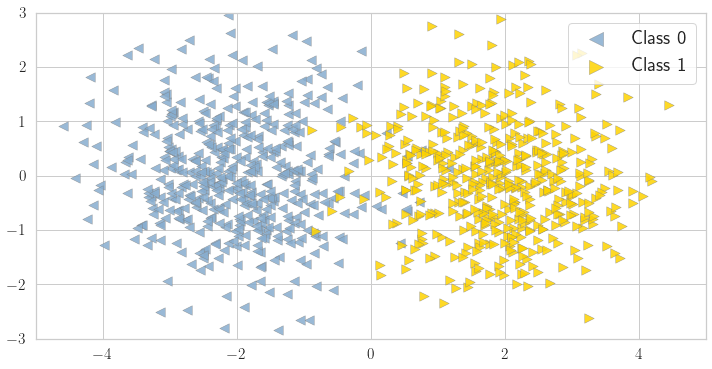

In [25]:
plt.figure(figsize=[12, 6])
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            edgecolor="gray",
            linewidths=0.4,
            alpha=0.85,
            marker='<',
            label='Class 0',
            s=90,
            c=colors[0].reshape(1, -1))
plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            edgecolor="gray",
            linewidths=0.4,
            alpha=0.85,
            marker='>',
            label='Class 1',
            s=90,
            c=colors[1].reshape(1, -1))
plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
plt.xlim([-5, 5])
plt.ylim([-3, 3])
# plt.show()
plt.savefig('img/well_sep_data_vis.pdf', bbox_inches='tight')

In [10]:
prob_class_1 = np.linspace(0.1,0.9,20)

In [11]:
risks_source_separable = list()
risks_target_separable_25 = list()
risks_target_separable_5 = list()
risks_target_separable_75 = list()

In [12]:
for cur_prob_class_1 in prob_class_1:
    risks_source_separable+=[compute_bayes_risk_binary(cur_prob_class_1,mu_1,mu_0)[0][0]]

for cur_prob_class_1 in prob_class_1:
    risks_target_separable_25 += [
        compute_bayes_risk_binary_label_shift(0.25, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]
    
for cur_prob_class_1 in prob_class_1:
    risks_target_separable_5 += [
        compute_bayes_risk_binary_label_shift(0.5, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]
    
for cur_prob_class_1 in prob_class_1:
    risks_target_separable_75 += [
        compute_bayes_risk_binary_label_shift(0.75, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]

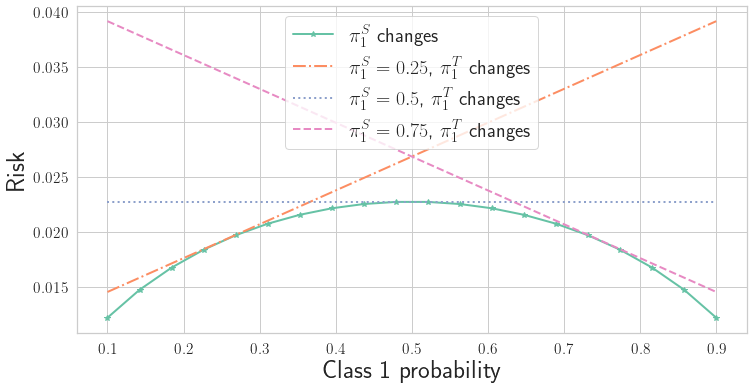

In [13]:
plt.plot(prob_class_1,
         risks_source_separable,
         marker='*',
         label=r'$\pi_1^S$ changes')
plt.plot(prob_class_1,
         risks_target_separable_25,
         linestyle='-.',
         label=r'$\pi^S_1=0.25$, $\pi_1^T$ changes')
plt.plot(prob_class_1,
         risks_target_separable_5,
         linestyle=':',
         label=r'$\pi^S_1=0.5$, $\pi_1^T$ changes')
plt.plot(prob_class_1,
         risks_target_separable_75,
         linestyle='--',
         label=r'$\pi^S_1=0.75$, $\pi_1^T$ changes')
plt.legend(prop={'size': 20})
plt.xlabel('Class 1 probability', fontsize=25)
plt.ylabel('Risk', fontsize=25)
# plt.show()
plt.savefig('img/risk_well_separable.pdf', bbox_inches='tight')

## largely-intersecting

In [7]:
mu_1 = np.array([1,0])
mu_0 = np.array([-1,0])
prob_class_1 = np.linspace(0.1,0.9,20)

In [8]:
X,y = generate_2d_example(0.5, mu_0, mu_1, 1000)

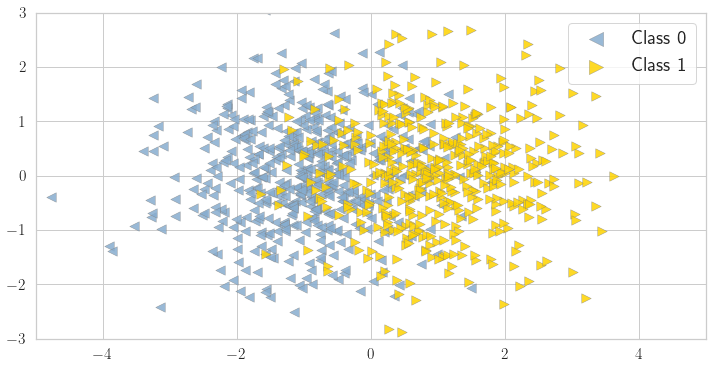

In [9]:
plt.figure(figsize=[12, 6])
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            edgecolor="gray",
            linewidths=0.4,
            marker='<',
            alpha=0.85,
            label= 'Class 0',
            s=90,
            c=colors[0].reshape(1, -1))
plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            edgecolor="gray",
            linewidths=0.4,
            marker='>',
            alpha=0.85,
            label= 'Class 1',
            s=90,
            c=colors[1].reshape(1, -1))
plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
plt.xlim([-5,5])
plt.ylim([-3,3])
# plt.show()
plt.savefig('img/not_well_sep_data_vis.pdf', bbox_inches='tight')

In [10]:
prob_class_1 = np.linspace(0.1,0.9,20)

In [11]:
risks_source_separable = list()
risks_target_separable_25 = list()
risks_target_separable_5 = list()
risks_target_separable_75 = list()

In [12]:
for cur_prob_class_1 in prob_class_1:
    risks_source_separable+=[compute_bayes_risk_binary(cur_prob_class_1,mu_1,mu_0)[0][0]]

for cur_prob_class_1 in prob_class_1:
    risks_target_separable_25 += [
        compute_bayes_risk_binary_label_shift(0.25, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]
    
for cur_prob_class_1 in prob_class_1:
    risks_target_separable_5 += [
        compute_bayes_risk_binary_label_shift(0.5, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]
    
for cur_prob_class_1 in prob_class_1:
    risks_target_separable_75 += [
        compute_bayes_risk_binary_label_shift(0.75, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]

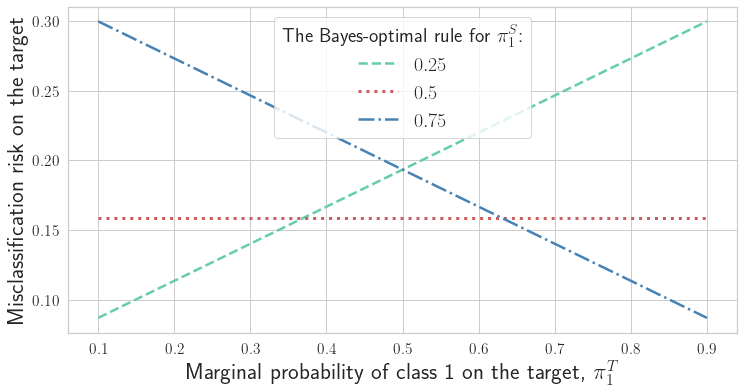

In [22]:
# plt.plot(prob_class_1,
#          risks_source_separable,
#          linestyle=':',
#          label='Source risk for ' + r'varying $\pi_1^S$')
plt.plot(prob_class_1,
         risks_target_separable_25,
         linestyle='--',
         linewidth=2.5,
         label=r'$0.25$', c='mediumaquamarine')
plt.plot(prob_class_1,
         risks_target_separable_5,
         linestyle=':',
         linewidth=3,
         label=r'$0.5$ ', c='indianred')
plt.plot(prob_class_1,
         risks_target_separable_75,
         linestyle='-.',
         linewidth=2.5,
         label=r'$0.75$', c= 'steelblue')
legend = plt.legend(loc=9, prop={'size': 20})
legend.set_title("The Bayes-optimal rule for $\pi_1^S$:", prop={'size': 20})
plt.xlabel('Marginal probability of class 1 on the target, $\pi_1^T$',
           fontsize=23)
plt.ylabel('Misclassification risk on the target', fontsize=23)
# plt.show()
plt.savefig('img/risk_not_well_separable.pdf', bbox_inches='tight')

In [32]:
# divide one long integer by another

In [45]:
def long_division(divident_num, divisor_num):
    """
    Function that performs division 
    """

    #storing answer as a string
    ans = ""

    idx = 0
    temp = ord(divident_num[idx]) - ord("0")
    while temp < divisor_num:
        temp = temp * 10 + (ord(divident_num[idx + 1]) - ord("0"))
        idx += 1

    idx += 1

    while len(divident_num) > idx:
        ans += chr(int(np.floor(temp // divisor)) + ord('0'))
        temp = temp % divisor * 10 + (ord(divident_num[idx]) - ord("0"))
        idx += 1

    ans += chr(int(np.floor(temp // divisor_num)) + ord('0'))

    if len(ans) == 0:
        return "0"

    return ans

In [46]:
number = "1248163264128256512";
divisor = 125

In [47]:
long_division(number,divisor)

'9985306113026052'